# Time Series

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

# Simple Exponential Smoothing

* Lets use Simple Exponential Smoothing to forecast the below oil data.

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


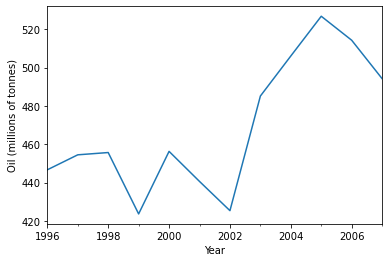

In [4]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

* Here we run three variants of simple exponential smoothing: 1. In fit1 we do not use the auto optimization but instead choose to explicitly provide the model with the α=0.2 parameter 2. In fit2 as above we choose an α=0.6 3. In fit3 we allow statsmodels to automatically find an optimized α value for us. This is the recommended approach.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


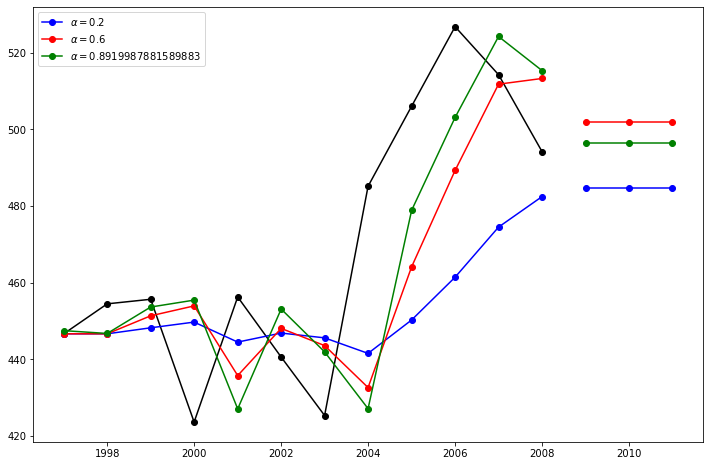

In [6]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

# Holt's method

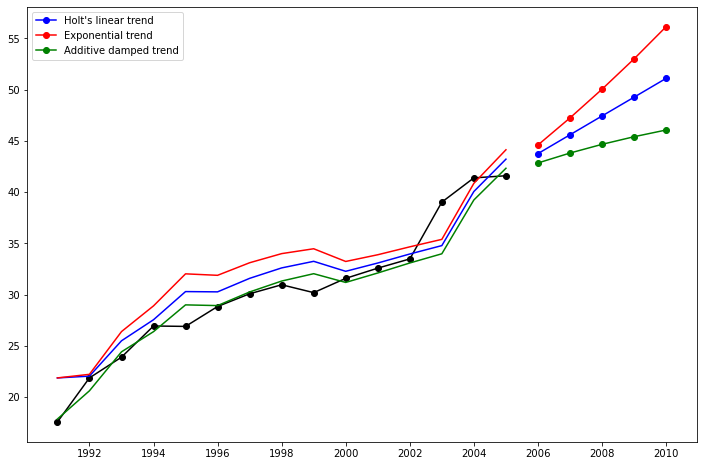

In [11]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt’s models. The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.

Note: fit4 does not allow the parameter ϕ to be optimized by providing a fixed value of ϕ=0.98

In [17]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2,exponential=True).fit()
fit4 = Holt(livestock2,damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock2,exponential=True, damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977634,0.978826,0.974909
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981647
$l_0$,263.918414,258.882601,260.341665,257.355089,258.952005
$b_0$,NaN,5.010788,1.013780,6.644294,1.038143
SSE,6761.350218,6004.138200,6104.194747,6036.555016,6081.995045


Plots of Seasonally Adjusted Data

The following plots allow us to evaluate the level and slope/trend components of the above table’s fits.

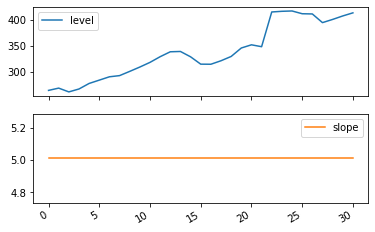

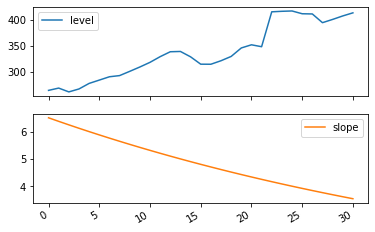

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [19]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

Comparison

Here we plot a comparison Simple Exponential Smoothing and Holt’s Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


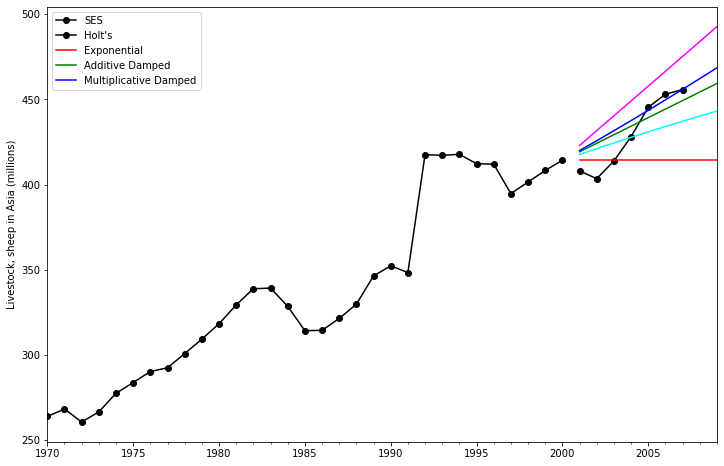

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [21]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

# Holt’s Winters Seasonal

Finally we are able to run full Holt’s Winters Seasonal Exponential Smoothing including a trend component and a seasonal component. statsmodels allows for all the combinations including as shown in the examples below: 1. fit1 additive trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation. 1. fit2 additive trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.. 1. fit3 additive damped trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation. 1. fit4 additive damped trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.

The plot shows the results and forecast for fit1 and fit2. The table allows us to compare the results and parameterizations.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


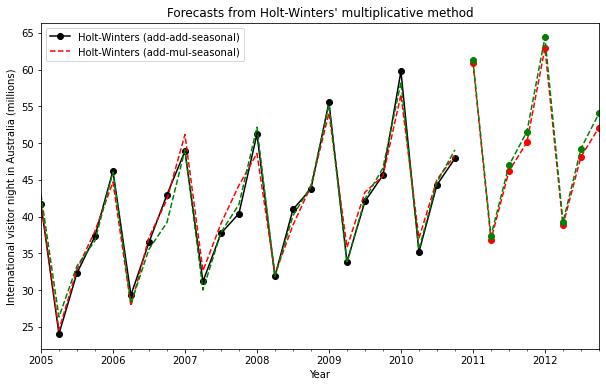

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,0.421053,5.767960e-09,0.368421,5.032309e-09
$\beta$,0.246942,5.477471e-13,0.046726,8.954665e-17
$\phi$,NaN,NaN,0.841069,9.659866e-01
$\gamma$,0.578947,6.768930e-09,0.631579,1.136867e-13
$l_0$,49.143099,5.056860e+01,49.383297,5.055426e+01
$b_0$,1.030709,9.129317e-01,1.087215,1.445688e+00
SSE,63.625578,3.459371e+01,68.386425,3.017934e+01


In [26]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

# The Internals

It is possible to get at the internals of the Exponential Smoothing models.

Here we show some tables that allow you to view side by side the original values yt, the level lt, the trend bt, the season st and the fitted values y^t. Note that these values only have meaningful values in the space of your original data if the fit is performed without a Box-Cox transformation.

In [29]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [31]:
df = pd.DataFrame(np.c_[aust, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit1.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,41.945938,1.007997,50.081834,-8.354334,41.7275
2005-04-01,24.571446,0.952926,50.866822,-26.825022,24.0418
2005-07-01,32.805764,0.903261,51.618627,-19.290527,32.3281
2005-10-01,38.039255,0.829380,52.222707,-14.894007,37.3287
2006-01-01,44.697753,0.986950,53.690170,-7.476970,46.2132
2006-04-01,27.852098,1.142311,55.306258,-25.959958,29.3463
2006-07-01,37.158042,1.072112,56.164299,-19.681399,36.4829
2006-10-01,42.342404,1.138168,57.503904,-14.526204,42.9777
2007-01-01,51.165102,0.902808,57.688977,-8.787477,48.9015
2007-04-01,32.631827,0.751874,57.980574,-26.800374,31.1802


In [33]:
df = pd.DataFrame(np.c_[aust, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit2.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,43.005338,0.912932,51.481528,0.835355,41.7275
2005-04-01,26.352753,0.912932,52.394459,0.502968,24.0418
2005-07-01,33.284584,0.912932,53.307391,0.624390,32.3281
2005-10-01,36.719504,0.912932,54.220323,0.677228,37.3287
2006-01-01,46.055825,0.912932,55.133254,0.835355,46.2132
2006-04-01,28.189456,0.912932,56.046186,0.502968,29.3463
2006-07-01,35.564685,0.912932,56.959118,0.624390,36.4829
2006-10-01,39.192555,0.912932,57.872049,0.677228,42.9777
2007-01-01,49.106313,0.912932,58.784981,0.835355,48.9015
2007-04-01,30.026159,0.912932,59.697913,0.502968,31.1802


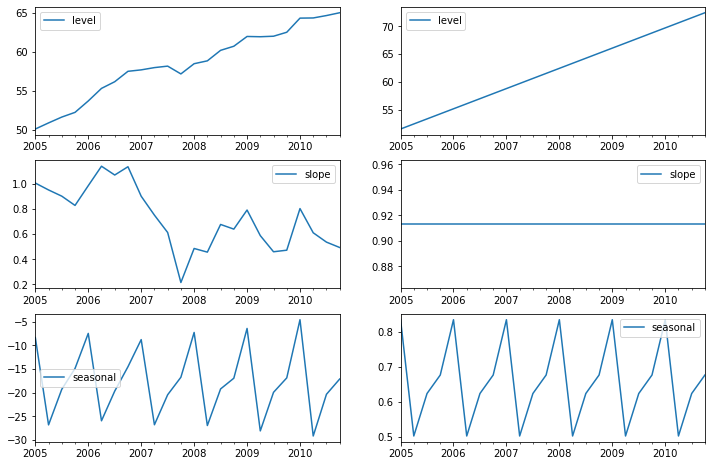

In [35]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()

# Simulations and Confidence Intervals¶

By using a state space formulation, we can perform simulations of future values. The mathematical details are described in Hyndman and Athanasopoulos [2] and in the documentation of HoltWintersResults.simulate.

Similar to the example in [2], we use the model with additive trend, multiplicative seasonality, and multiplicative error. We simulate up to 8 steps into the future, and perform 1000 simulations. As can be seen in the below figure, the simulations match the forecast values quite well.

[2] [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice, 2nd edition. OTexts, 2018.](https://otexts.com/fpp2/ets.html)

In [37]:
fit = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit()
simulations = fit.simulate(8, repetitions=100, error='mul')

ax = aust.plot(figsize=(10,6), marker='o', color='black',
               title="Forecasts and simulations from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style='--', color='green')
simulations.plot(ax=ax, style='-', alpha=0.05, color='grey', legend=False)
fit.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


AttributeError: 'HoltWintersResults' object has no attribute 'simulate'